In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


In [6]:
#ignore python warnings
warnings.filterwarnings('ignore')

In [7]:
#Read data from excel worksheets
df_Kayaking =pd.read_excel("V02Max_Combined.xlsx",sheet_name="Kayaking")
df_Athletes=pd.read_excel("V02Max_Combined.xlsx",sheet_name="Athletes")
df_Triathlon=pd.read_excel("V02Max_Combined.xlsx",sheet_name="Triathlon")
df_Fencing=pd.read_excel("V02Max_Combined.xlsx",sheet_name="Fencing")

In [9]:
#concatenate all sports data to form a single dataframe
df_data = pd.concat([df_Kayaking,df_Triathlon,df_Fencing,df_Athletes],ignore_index=True)

In [10]:
#verify data
df_data.describe()

,ID,time,RR,VO2,power,age,Weight,Height,P_vt1,P_vt2
count,52080.000000,52062.00000,50914.000000,52062.000000,52062.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,9.518760,547.45914,443.583808,1.539104,106.528754,15.222222,64.761111,173.277778,113.055556,187.277778
std,5.043953,386.29623,212.585991,0.799706,88.603627,1.957055,15.545120,10.447660,46.949876,63.292789
min,1.000000,-219.87200,252.000000,0.069354,0.000000,12.000000,39.700000,156.000000,50.000000,108.000000
25%,5.000000,244.29500,352.000000,0.972290,0.000000,14.000000,54.325000,165.000000,79.250000,141.250000
50%,10.000000,542.03800,412.000000,1.419143,95.000000,15.000000,62.900000,174.000000,105.500000,169.000000
75%,14.000000,822.13900,484.000000,2.043474,170.000000,16.750000,76.475000,182.000000,143.000000,246.750000
max,18.000000,1504.05600,30500.000000,4.576774,335.000000,18.000000,89.900000,191.000000,215.000000,300.000000


In [16]:
# Export Dataframe to Excel by eliminating index
df_data.to_excel("V02Max_Sports.xlsx",sheet_name="All_Sports",index=False)

In [14]:
# cooldown = time>0 and power =0
# warmup = time<0 and power =0
# GET(graded exercise test) =time>0 and power>0

df_data["stage"] = ""
df_data.loc[df_data["power"] == 0, "stage"] = "cooldown"
df_data.loc[df_data["time"] < 0, "stage"] = "warmup"
df_data.loc[df_data["power"] > 0, "stage"] = "GET"

In [29]:
# Verify top five rows
df_data.head()

,ID,time,RR,VO2,power,age,Weight,Height,P_vt1,P_vt2,sport,Gender,Ethnicity,First Name,Last Name,stage
0,11,-168.600,727.0,0.287147,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,warmup
1,11,-167.872,728.0,0.287147,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,warmup
2,11,-167.148,724.0,0.287147,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,warmup
3,11,-166.484,664.0,0.320580,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,warmup
4,11,-165.836,648.0,0.320580,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,warmup


In [30]:
#verify the count of rows for each stage
df_data["stage"].value_counts()

stage
GET         38733
cooldown     9088
warmup       4241
               18
Name: count, dtype: int64

In [31]:
file_path_Athletes="./Athletes.csv"
file_path_Kayaking="./Kayaking.csv"
file_path_Triathlon="./Triathlon.csv"
file_path_Fencing="./Fencing.csv"

16.Calculate the BMI of every athlete and display it as a list.



In [33]:

df_Athletes['BMI'] = df_Athletes['Weight'] /df_Athletes['Height']**2
print(df_Athletes)

    ID  age  Weight  Height  P_vt1  P_vt2      sport  Gender Ethnicity  \
0    1   15    53.7     161     50    140    fencing  Female   African   
1    2   15    56.2     162     80    127    fencing    Male   African   
2    3   16    89.9     191    155    300    fencing    Male     White   
3    4   16    76.5     180    215    275    fencing    Male     White   
4    5   17    76.4     186    110    172    fencing  Female     White   
5    6   17    65.6     169    131    186    fencing  Female     White   
6    7   15    49.8     165     65    108    fencing  Female     White   
7    8   15    51.2     165     80    133    fencing  Female     White   
8    9   14    57.1     176     50    125    fencing  Female   African   
9   10   14    58.8     177    101    162    fencing  Female   African   
10  11   18    84.8     182    174    268      kayak  Female   African   
11  12   18    86.0     183    170    294      kayak    Male   African   
12  13   18    83.9     183    144    

17.What is the maximum ventilatory threshold for triathletes.
**

In [33]:
HR = df_data[df_data.columns[df_data.columns.str.contains('HR', case=False)].tolist()[0]]


In [35]:
HR = df_data["HR"]  # Assuming "HR" is the column name in your DataFrame
# Assuming df_data is your DataFrame and has columns "HR", "VO2", and "power"
HR = df_data["HR"]
VO2 = df_data["VO2"]
power = df_data["power"]

vt_hr, vt_power = calculate_vt_max(HR, VO2, power)
print(f"Maximum Ventilatory Threshold HR: {vt_hr} bpm")
print(f"Power at VT: {vt_power} watts")


Maximum Ventilatory Threshold HR: 187.5 bpm
Power at VT: 305.0 watts


18.Display the number of athletes in every sport against the name of the sport.


In [37]:
athelet_count = df_Athletes.groupby(['sport', 'First Name']).size().reset_index()
print(athelet_count)

        sport First Name  0
0     fencing      Aiden  1
1     fencing        Ava  1
2     fencing      Chloe  1
3     fencing      Ethan  1
4     fencing      Grace  1
5     fencing    Jackson  1
6     fencing       Liam  1
7     fencing       Lily  1
8     fencing     Olivia  1
9     fencing     Sophia  1
10      kayak      Caleb  1
11      kayak     Harper  1
12      kayak   Isabella  1
13      kayak      Logan  1
14      kayak      Mason  1
15      kayak        Mia  1
16  triathlon      Lucas  1
17  triathlon       Owen  1


19.Display a bar chart showing the average V02 Max by sport.


In [40]:

#df_Athletes['sport']
df_data = pd.concat([df_Kayaking,df_Triathlon,df_Fencing,df_Athletes],ignore_index=True)
#df_data.describe()
df_data['VO2'].max()


4.576773815

In [42]:
df_data.describe()

,ID,time,RR,VO2,power,age,Weight,Height,P_vt1,P_vt2,BMI
count,52080.000000,52062.00000,50914.000000,52062.000000,52062.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,9.518760,547.45914,443.583808,1.539104,106.528754,15.222222,64.761111,173.277778,113.055556,187.277778,0.002124
std,5.043953,386.29623,212.585991,0.799706,88.603627,1.957055,15.545120,10.447660,46.949876,63.292789,0.000302
min,1.000000,-219.87200,252.000000,0.069354,0.000000,12.000000,39.700000,156.000000,50.000000,108.000000,0.001590
25%,5.000000,244.29500,352.000000,0.972290,0.000000,14.000000,54.325000,165.000000,79.250000,141.250000,0.001878
50%,10.000000,542.03800,412.000000,1.419143,95.000000,15.000000,62.900000,174.000000,105.500000,169.000000,0.002136
75%,14.000000,822.13900,484.000000,2.043474,170.000000,16.750000,76.475000,182.000000,143.000000,246.750000,0.002345
max,18.000000,1504.05600,30500.000000,4.576774,335.000000,18.000000,89.900000,191.000000,215.000000,300.000000,0.002568


In [44]:
average_vo2_max = df_data['VO2'].mean()
print(average_vo2_max)

1.5391044113375014


<Axes: title={'center': 'Avg of VO2 by sport'}, xlabel='sport'>

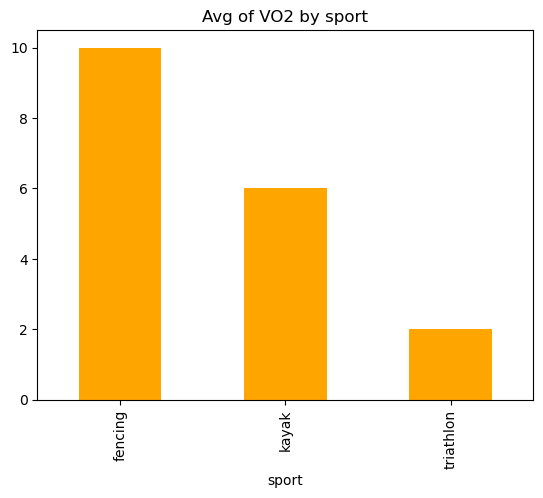

In [46]:
df_data['sport'].value_counts().plot(kind='bar', title='Avg of VO2 by sport', color='orange')


20.Analyze the trend of HR at the start of the test vs the middle and the end.What is the overall trend? 


In [49]:
df_data = pd.concat([df_Kayaking,df_Triathlon,df_Fencing,df_Athletes], axis = 1)


In [118]:
average_rr = df_data['RR'].mean()
print(average_rr)
plt.figure(figsize=(8, 5))
plt.plot(average_rr.ID, average_rr.values, marker='o', color='blue')
plt.grid(True)
plt.show()

RR    445.303741
RR    448.370517
RR    441.626345
dtype: float64


AttributeError: 'Series' object has no attribute 'ID'

<Figure size 800x500 with 0 Axes>

21. Display a pie chart of number of athletes by sport.


In [126]:
pie_sport_counts = df_data['sport'].value_counts()


<Axes: title={'center': 'Sport Distribution'}, ylabel='count'>

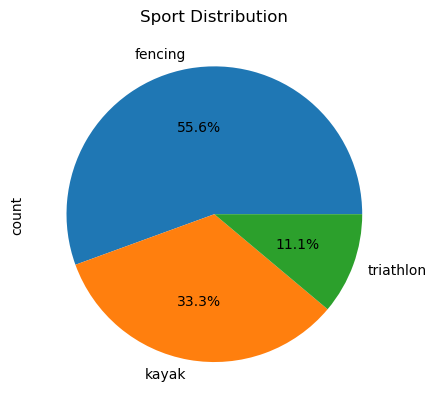

In [128]:
pie_sport_counts.plot(kind='pie', title='Sport Distribution', autopct='%1.1f%%')

22. Using any 10 HR values print even if the value is an even number and odd if its an odd number


In [330]:
df_data["HR"]= 60/(df_data["RR"]/1000)
df_data.head(10)


,ID,time,RR,VO2,power,age,Weight,Height,P_vt1,P_vt2,sport,Gender,Ethnicity,First Name,Last Name,HR,Minute
0,11,1969-12-31 23:59:59.999999832,727.0,0.287147,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.530949,1969-12-31 23:59:00
1,11,1969-12-31 23:59:59.999999833,728.0,0.287147,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.417582,1969-12-31 23:59:00
2,11,1969-12-31 23:59:59.999999833,724.0,0.287147,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.872928,1969-12-31 23:59:00
3,11,1969-12-31 23:59:59.999999834,664.0,0.320580,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.361446,1969-12-31 23:59:00
4,11,1969-12-31 23:59:59.999999835,648.0,0.320580,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.592593,1969-12-31 23:59:00
5,11,1969-12-31 23:59:59.999999835,620.0,0.320580,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.774194,1969-12-31 23:59:00
6,11,1969-12-31 23:59:59.999999836,696.0,0.320580,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.206897,1969-12-31 23:59:00
7,11,1969-12-31 23:59:59.999999837,800.0,0.320580,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.000000,1969-12-31 23:59:00
8,11,1969-12-31 23:59:59.999999838,792.0,0.320580,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.757576,1969-12-31 23:59:00
9,11,1969-12-31 23:59:59.999999838,772.0,0.320580,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.720207,1969-12-31 23:59:00


In [332]:
df_data['HR_int'] = df_data['HR'].round(0)

for value in df_data['HR_int'].head(10):
     if value%2 == 0:
        print(f'{value} is even')
     else:
        print(f'{value} is odd')


83.0 is odd
82.0 is even
83.0 is odd
90.0 is even
93.0 is odd
97.0 is odd
86.0 is even
75.0 is odd
76.0 is even
78.0 is even


23. Which heart rate zone did most participants spend the longest duration of time in?
**

In [21]:
df_data["HR"]= 60/(df_data["RR"]/1000)

df_hr_zone = pd.DataFrame(df_data)

def get_hr_zone(HR):
    if HR < 120:
        return 'Zone 1'
    elif 120 <= HR < 140:
        return 'Zone 2'
    elif 140 <= HR < 160:
        return 'Zone 3'
    else:
        return 'Zone 4'

# Apply function to create a 'Zone' column
df_hr_zone['Zone'] = df_data['HR'].apply(get_hr_zone)

print(df_data)


       ID     time     RR       VO2  power          HR
0      11 -168.600  727.0  0.287147      0   82.530949
1      11 -167.872  728.0  0.287147      0   82.417582
2      11 -167.148  724.0  0.287147      0   82.872928
3      11 -166.484  664.0  0.320580      0   90.361446
4      11 -165.836  648.0  0.320580      0   92.592593
...    ..      ...    ...       ...    ...         ...
52057  10  942.700  428.0  0.786363      0  140.186916
52058  10  943.124  424.0  0.786363      0  141.509434
52059  10  943.552  428.0  0.786363      0  140.186916
52060  10  943.976  424.0  0.786363      0  141.509434
52061  10  944.404  428.0  0.786363      0  140.186916

[52062 rows x 6 columns]


24. Store athlete name and sport in a dictionary as a pair of values.


In [51]:
df_data = pd.concat([df_Kayaking,df_Triathlon,df_Fencing,df_Athletes],ignore_index=True)

In [3]:
#df_Athletes.describe()

In [53]:


selected_data = df_Athletes.loc[:,['First Name', 'sport']]


athlete_dict = selected_data.to_dict(orient='dict')

print(athlete_dict)

{'First Name': {0: 'Olivia', 1: 'Ethan', 2: 'Jackson', 3: 'Liam', 4: 'Ava', 5: 'Sophia', 6: 'Grace', 7: 'Aiden', 8: 'Chloe', 9: 'Lily', 10: 'Isabella', 11: 'Caleb', 12: 'Mia', 13: 'Harper', 14: 'Mason', 15: 'Logan', 16: 'Lucas', 17: 'Owen'}, 'sport': {0: 'fencing', 1: 'fencing', 2: 'fencing', 3: 'fencing', 4: 'fencing', 5: 'fencing', 6: 'fencing', 7: 'fencing', 8: 'fencing', 9: 'fencing', 10: 'kayak', 11: 'kayak', 12: 'kayak', 13: 'kayak', 14: 'kayak', 15: 'kayak', 16: 'triathlon', 17: 'triathlon'}}


25. Using arrays and loops, find the count of athletes based on gender.


In [55]:
male_count = 0
female_count = 0

for Gender in df_data['Gender']:
    if Gender == 'Male':
        male_count += 1
    elif Gender == 'Female':
        female_count += 1


print("male", male_count)
print("female", female_count)

male 8
female 10


26. Create a sankey diagram to show the groups of race within each sport


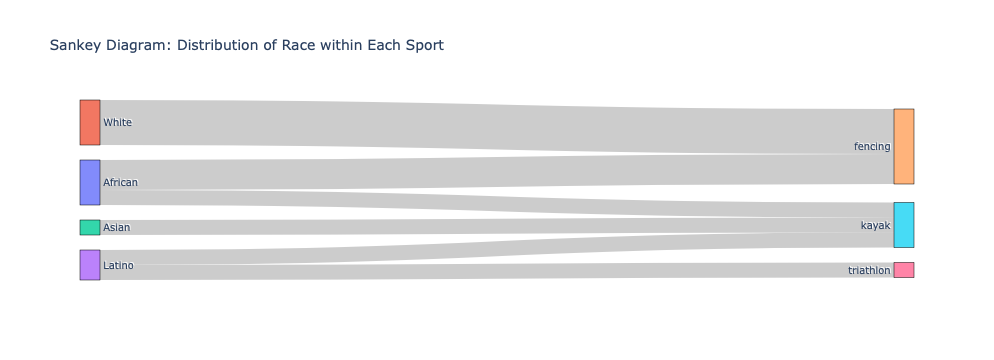

In [41]:
import pandas as pd
import plotly.graph_objects as go


ethni_col = 'Ethnicity' 
sport_col = 'sport' 

races = df_Athletes[ethni_col].unique()
sports = df_Athletes[sport_col].unique()

labels = list(races) + list(sports)

source = []
target = []
value = []

for i, race in enumerate(races):
    for j, sport in enumerate(sports):
        count = df_Athletes[(df_Athletes[ethni_col] == race) & (df_Athletes[sport_col] == sport)].shape[0]
        if count > 0:
            source.append(i)  # Index of the race in the labels list
            target.append(len(races) + j)  # Index of the sport in the labels list
            value.append(count)


fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
    )
)])

fig.update_layout(title_text="Sankey Diagram: Distribution of Race within Each Sport", font_size=10)
fig.show()


27. Calculate the average heart rate for every minute for every athlete and add it as a column in the same dataframe.


In [69]:
df_data["HR"] = 60/(df_data.RR/1000)
df_data.head(10)
df_data['time'] = pd.to_datetime(df_data['time'])

In [73]:
df_data['Minute'] = df_data['time'].dt.floor('T')
avg_hr_rate = df_data.groupby(['First Name', 'Minute'])['HR'].mean().reset_index()
print(avg_hr_rate)

Empty DataFrame
Columns: [First Name, Minute, HR]
Index: []


28.  Print athlete 15s Age and Pvt1 using the format() function


In [117]:
age_athlete = df_Athletes[df_Athletes['age'] == 15].iloc[0] 

age = age_athlete['age']
pvt1 = age_athlete['P_vt1']


print("Athlete 15's Age is {} and Pvt1 is {}".format(age, pvt1))


Athlete 15's Age is 15 and Pvt1 is 50


29. On average how long was each participants’ warm up?


In [ ]:

df_data["stage"] = ""
df_data.loc[df_data["power"] == 0, "stage"] = "cooldown"
df_data.loc[df_data["time"] < 0, "stage"] = "warmup"
df_data.loc[df_data["power"] > 0, "stage"] = "GET"
df_data.head()


In [135]:


warmup_times = df_data.loc[df_data['stage'] == 'warmup', 'time'].abs()

avg_wp_time = warmup_times.mean()

print(f"On average, each participant's warm-up time was {avg_wp_time:.2f} minutes.")


On average, each participant's warm-up time was 90.06 minutes.


30. Display the HRV of each athlete?


In [ ]:
df_RR = df_data.copy()
#calculated differences of RR_intervals
df_RR["HRV"]= df_RR.groupby("ID")["RR"].diff()
# Calculated HRV as standard deviation of RR_interval diffrences and updated to the athelete dataframe. 
df_Athletes = pd.merge(df_Athletes,df_RR.groupby("ID")["HRV"].std(), on="ID")


In [ ]:
df_Athletes.reset_index()[["First Name","Last Name","HRV"]].values.tolist()

31. Return the count of athletes for any sport that the user inputs.


In [ ]:
df_data = pd.concat([df_Kayaking,df_Triathlon,df_Fencing,df_Athletes],ignore_index=True)

In [174]:

df_data = pd.concat([df_Kayaking,df_Triathlon,df_Fencing,df_Athletes],ignore_index=True)
def count_athletes_for_sport(sport):
    # Check if the sport exists in the DataFrame
    if sport in df_data['sport'].values:
        # Filter DataFrame for the specified sport and count unique athletes
        count = df_data[df_data['sport'] == sport]['ID'].nunique()
        return count
    else:
        return "Sport not found in the DataFrame."

# Example user input
user_input_sport = 'fencing'
athlete_count = count_athletes_for_sport(user_input_sport)
print(f"Number of athletes participating in {user_input_sport}: {athlete_count}")

Number of athletes participating in fencing: 10


In [ ]:
32.Insert the name of every athlete into an array and display the length of that array.


In [94]:
print(df_data.columns)

Index(['ID', 'time', 'RR', 'VO2', 'power'], dtype='object')


In [100]:
df_data = pd.concat([df_Kayaking,df_Triathlon,df_Fencing,df_Athletes], axis = 1)

In [102]:
athlete_names = df_data['First Name'].tolist()
print("Length of the list:", len(athlete_names))

Length of the list: 27603
